# Libraries and Imported Dataset

In [45]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


penguins = sns.load_dataset("penguins")

def snake_case(column_name):
    return column_name.strip().replace(' ', '_').lower()
penguins.rename(columns=snake_case, inplace=True)

In [2]:
print(penguins)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2     

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# The Seaborn Violin Plot

### The Seaborn Violin Plot shows the distribution of quantitaive data across several levels of one or more categorical variables so the distributions can be compared. Very effective in showing multiple distirbutions of data at once. This could be misleading when using smaller datasets because it may appear smoother than the actual data distirbution. 

Text(0, 0.5, 'Body Mass (g)')

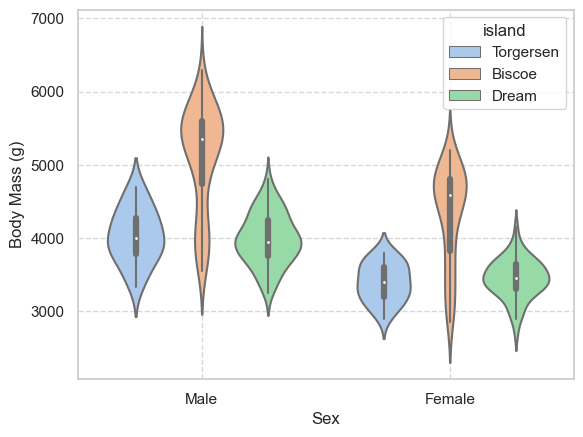

In [56]:
sns.set_theme(style="whitegrid") #sets the theme 
sns.violinplot(x = "sex",  #X value
               y = "body_mass_g",   #Y value
               data = penguins,  #Dataframe 
               hue = "island", #Indicates the specific colors used to distinguish between the islands 
               palette = "pastel") #Uses the orange palette 
plt.grid(True, 
         linestyle='--', #Specific linestyle of gridline
         alpha=0.75) #Sets transparents levels to 0.75
plt.xlabel("Sex") #Sets x axis title
plt.ylabel("Body Mass (g)") #Sets y axis title 


# The Seaborn Conditional Kernel Density Estimate 


### This graph is an effective tool for visualizing and analyzing conditional distributions and in particular, useful for exploring the creation of conditional density plots. The kernel density estimate plot is also effective in visualizing distributions using a continous probability density curve in one or more dimensions. Relative to a histogram is produces a plot less cluttered and more interpretable. On the other hand it does have the potential to introduce distortions if the data is initially bounded or not smooth. 

/Users/katebecker/anaconda3/envs/squirrelgurlz/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


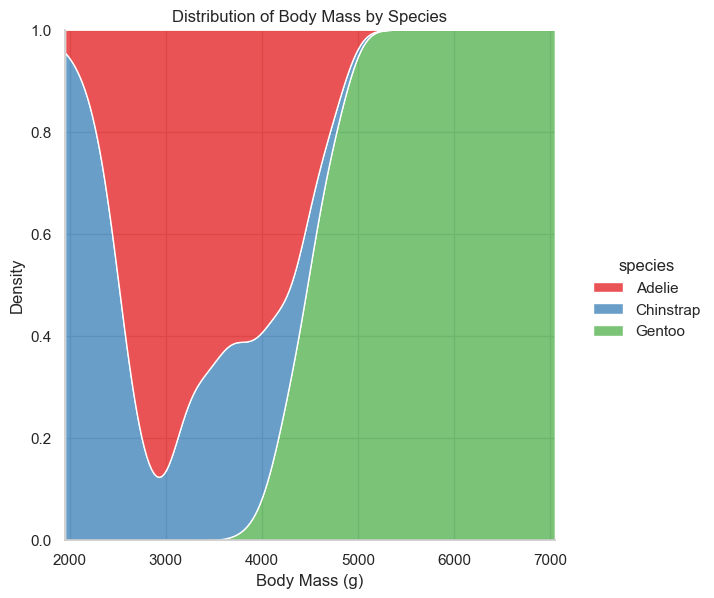

In [52]:
#Sets the Seaborn theme to whitegrid which provides a white background with gridlines
sns.set_theme(style="whitegrid")

displot = sns.displot( #Creates the distribution plot sns.displot(...)
    data=penguins, #dataframe
    x="body_mass_g", 
    hue="species", #Indicates the specific colors used to distinguish between species  
    kind="kde", #Specifies that a kernel density estimation (KDE) plot is used to visualize distribution. KDE is a smoothed representation of the probability density of the data. 
    height=6, #Sets height of plot to 6 inches
    multiple="fill", #Normalizes the KDEs to fill plot area
    palette="Set1", #Creates the color palette, effective for colorblindness
)

displot.set(title = "Distribution of Body Mass by Species") #Creates title 
displot.set_axis_labels(x_var = "Body Mass (g)") #Creates unique axis labels 

#Did not set x limits to begin at 0 because there is no data for body mass below 2000g and therefore creates a blank in the graph 

# The Seaborn Paired Density and Scatterplot Matrix

### This graph is effective in visualizing and exploring the relationships between multiple pairs of variables simultaneously. Each cell in the matrix represents a different relationship between two variables making it easier to identify patterns, correlations, distributions, and associations. This can also be a useful tool in examing gaps in data such as discrepancies or missing values. 

Text(0.5, 0.98, 'Variable Relationships and Distribution By Species')

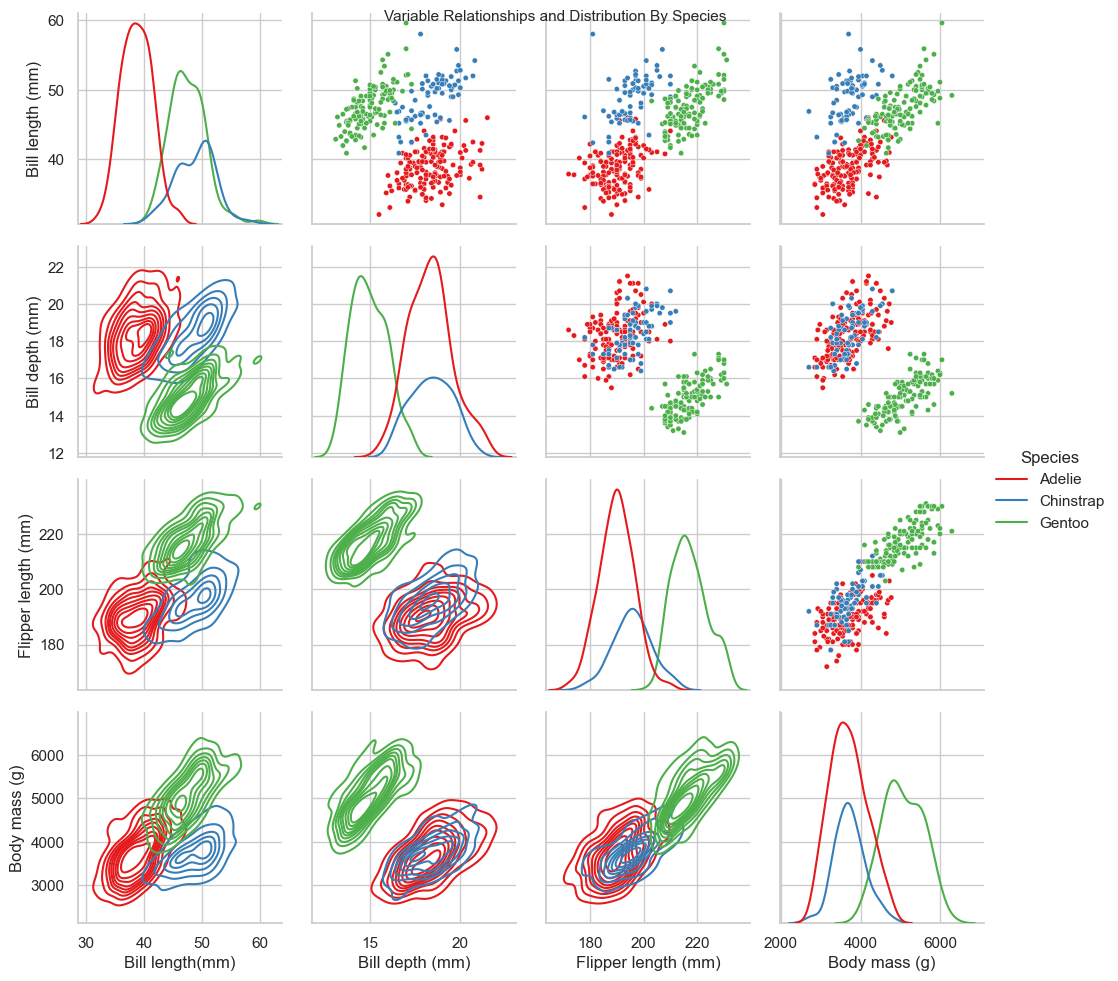

In [57]:
sns.set_theme(style="whitegrid") #Sets the theme to a white background with gridlines 

penguingrid = sns.load_dataset("penguins") #Loads the dataframe 

pgrid = sns.PairGrid(penguingrid,  #This creates a PairGrid
                 diag_sharey=False, #Specifies that the y axes for diagonal plots should not be shared but should be unique 
                 hue = "species", #Specifies the species by particular color 
                 palette= "Set1")  #Uses the plasma palette 
pgrid.map_upper(sns.scatterplot, s=15, edgecolor = 'w') #Maps the upper triangle of the PairGrid with scatterplots. Also sets the size and edgecolor for the scatterpoints. 
pgrid.map_lower(sns.kdeplot) #Sets the lower triangle to kde plots
pgrid.map_diag(sns.kdeplot, lw=1.5) #MAps the diaganol of the PairGrid with KDE plots and specifically KDE curves with linewidths of 1.5.
#KDE curves are the actual smoothed curves representing the estimated probability density funciton of a continous random variable while the plots refer 
#to the visual representation of the KDE curves on a plot. 
pgrid.add_legend(title="Species") #Creates a legend  

#The axes below sets unique x and y labels based off the position [row, column]
pgrid.axes[0, 0].set_ylabel("Bill length (mm)")
pgrid.axes[1, 0].set_ylabel("Bill depth (mm)")
pgrid.axes[2, 0].set_ylabel("Flipper length (mm)")
pgrid.axes[3, 0].set_ylabel("Body mass (g)")
pgrid.axes[3, 0].set_xlabel("Bill length(mm)")
pgrid.axes[3, 1].set_xlabel("Bill depth (mm)")
pgrid.axes[3, 2].set_xlabel("Flipper length (mm)")
pgrid.axes[3, 3].set_xlabel("Body mass (g)")

pgrid.fig.suptitle("Variable Relationships and Distribution By Species", fontsize =11) #Creates a title for the plot 



Citations: 
- https://seaborn.pydata.org/generated/seaborn
- https://www.statology.org/seaborn-title/
- https://matplotlib.org/stable/index.html
